In [1]:
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

MAX_ITERATION = 10000

In [2]:
def data_generator(mean1, cov1, mean2, cov2, num):
    np.random.seed(0)
    X = np.random.multivariate_normal(mean1, cov1, num//2)
    np.random.seed(1)
    y = np.full(num//2, -1, dtype=int)
    X_ = np.random.multivariate_normal(mean2, cov2, num-num//2)
    y_ = np.full(num-num//2, 1, dtype=int)
    X1 = np.concatenate((X, X_), axis=0)
    y1 = np.concatenate((y, y_))

    return shuffle(X1, y1)


def drawer(X, y, w1, w2):
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    for i in range(len(y)):
        if y[i] == 1:
            ax[0].scatter(X[i, 0], X[i, 1], c='r', marker='o')
        else:
            ax[0].scatter(X[i, 0], X[i, 1], c='b', marker='x')

    l_x = np.linspace(np.min(X), np.max(X), X.shape[0])
    l_y = -(w1[0]/w1[2]+w1[1]/w1[2]*l_x)
    ax[0].plot(l_x, l_y)
    xy_max = np.max(X, axis=0)
    ax[0].set(xlim=(-xy_max[0]-1, xy_max[0]+1), ylim=(-xy_max[1]-1, xy_max[1]+1),
              xlabel="x",
              ylabel="y",
              title="SSErr")

    for i in range(len(y)):
        if y[i] == 1:
            ax[1].scatter(X[i, 0], X[i, 1], c='r', marker='o')
        else:
            ax[1].scatter(X[i, 0], X[i, 1], c='b', marker='x')

    l_x = np.linspace(np.min(X), np.max(X), X.shape[0])
    l_y = -(w2[0]/w2[2]+w2[1]/w2[2]*l_x)
    ax[1].plot(l_x, l_y)
    xy_max = np.max(X, axis=0)
    ax[1].set(xlim=(-xy_max[0]-1, xy_max[0]+1), ylim=(-xy_max[1]-1, xy_max[1]+1),
              xlabel="x",
              ylabel="y",
              title="LMSalg")


def SSErr(X, y):
    X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

    X_ = np.dot(np.linalg.pinv(np.dot(X.T, X)), X.T)
    w = np.dot(X_, y)

    h = np.sign(np.dot(X, w))
    mistake_indices = np.where(h != y)[0]
    mistake_num = len(mistake_indices)
    MSE = 1/(X.shape[0]) * (np.linalg.norm(np.dot(X, w) - y))**2
    print('Final weight vector of SSErr is', w)
    print('MSE of SSErr is', MSE)
    print('Accuracy of SSErr is %.2f%%' %
          (100*(X.shape[0]-mistake_num)/X.shape[0]))
    return w


def LMSalg(X, y, w_init, max_iter, lr=0.001, eps=1e-5):
    w = w_init
    X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

    for i in range(max_iter):
        for j in range(X.shape[0]):
            diff = (np.dot(X[j], w) - y[j])*X[j]
            w_ = w - lr * diff

            delta = np.linalg.norm(w - w_)
            if delta < eps:
                break
            else:
                w = w_

    h = np.sign(np.dot(X, w))
    mistake_indices = np.where(h != y)[0]
    mistake_num = len(mistake_indices)
    MSE = 1/(X.shape[0]) * (np.linalg.norm(np.dot(X, w) - y))**2
    print('Initial weight vector of LMSalg is', w_init)
    print('Final weight vector of LMSalg is', w)
    print('MSE of LMSalg is', MSE)
    print('Accuracy of LMSalg is %.2f%%' %
          (100*(X.shape[0]-mistake_num)/X.shape[0]))
    return w

Final weight vector of SSErr is [-0.0006422   0.18995973  0.01604448]
MSE of SSErr is 0.03611790500941601
Accuracy of SSErr is 100.00%
Initial weight vector of LMSalg is [ 0.94251136 -0.61963218 -0.2191084 ]
Final weight vector of LMSalg is [0.00161835 0.19430329 0.02276712]
MSE of LMSalg is 0.03666787546545437
Accuracy of LMSalg is 100.00%


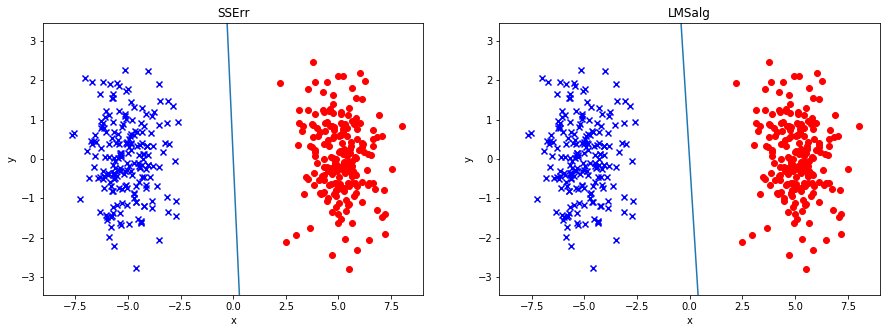

In [10]:
X1, y1 = data_generator([-5, 0], np.identity(2), [5, 0], np.identity(2), 400)
np.random.seed()
w_init = np.random.randn(3)

w1 = SSErr(X1, y1)
w2 = LMSalg(X1, y1, w_init, MAX_ITERATION)
drawer(X1, y1, w1, w2)

Final weight vector of SSErr is [-0.00134437  0.39381074  0.03389635]
MSE of SSErr is 0.1831782158629068
Accuracy of SSErr is 97.75%
Initial weight vector of LMSalg is [ 0.01302126  1.1739214  -0.41928666]
Final weight vector of LMSalg is [-0.0009965   0.39073042  0.05373968]
MSE of LMSalg is 0.1836133893273038
Accuracy of LMSalg is 97.50%


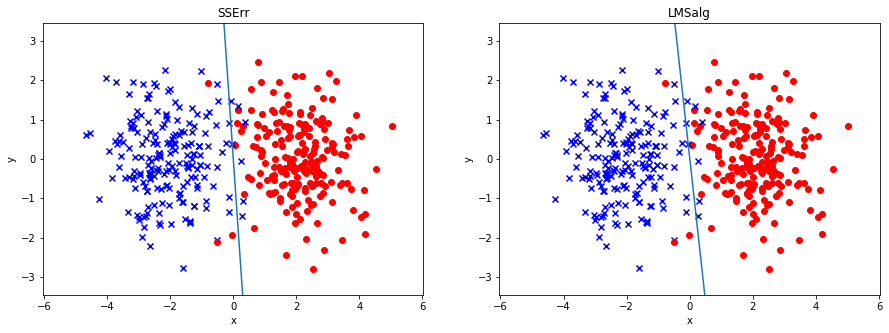

In [11]:
X1, y1 = data_generator([-2, 0], np.identity(2), [2, 0], np.identity(2), 400)
np.random.seed()
w_init = np.random.randn(3)

w1 = SSErr(X1, y1)
w2 = LMSalg(X1, y1, w_init, MAX_ITERATION)
drawer(X1, y1, w1, w2)

Final weight vector of SSErr is [-0.00175717  0.50701062  0.04492524]
MSE of SSErr is 0.4553883317834238
Accuracy of SSErr is 86.50%
Initial weight vector of LMSalg is [-0.01063204 -1.93729673  0.46141598]
Final weight vector of LMSalg is [-0.02932584  0.51332469  0.10256929]
MSE of LMSalg is 0.45929041047590785
Accuracy of LMSalg is 86.75%


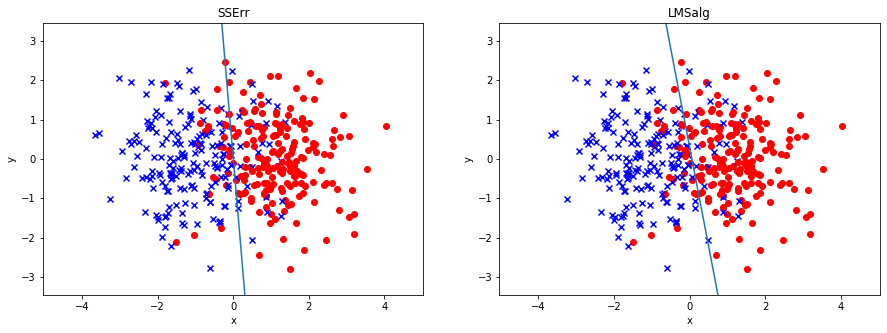

In [12]:
X1, y1 = data_generator([-1, 0], np.identity(2), [1, 0], np.identity(2), 400)
np.random.seed()
w_init = np.random.randn(3)

w1 = SSErr(X1, y1)
w2 = LMSalg(X1, y1, w_init, MAX_ITERATION)
drawer(X1, y1, w1, w2)